# Ames, Iowa : Predicting Sales Prices - Descision Tree and Random Forest modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,\
MinMaxScaler, MaxAbsScaler, FunctionTransformer, PowerTransformer
from LR_helper import cat_column_combine_vars, num_new_features,\
label_encode_features, model_results, cat_new_features, std_num_cols
from yellowbrick.regressor import PredictionError, ResidualsPlot
from clean_helper import dtype_update
from dtree_rf_helper import tree_label_encode, tree_model_res
from IPython.display import display
from IPython.display import SVG
import graphviz as gv
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

### Loading cleaned training and testing datasets:-

In [2]:
train_df = pd.read_csv("clean_train.csv",index_col=0)
test_df = pd.read_csv("clean_test.csv",index_col=0)
print(train_df.shape)
print(test_df.shape)

(1453, 80)
(1457, 79)


### Creating new numerical variables, combining variables and creating new categorical variables:-

In [3]:
# Creating new numerical variable features:-
num_new_features(train_df)
num_new_features(test_df)

# Combining categories in some categorical features:-
cat_column_combine_vars(train_df)
cat_column_combine_vars(test_df)

# Creating new categorical variable features:-
cat_new_features(train_df)
cat_new_features(test_df)

### Label encoding all categorical features (all dataframes):

In [4]:
# Label encoding via helper functions:

tree_label_encode(train_df)
tree_label_encode(test_df)

### Standardizing numerical columns:

In [5]:
# Standardizing via helper functions:

std_num_cols(train_df)
std_num_cols(test_df)

### Dropping some features with high multi-collinearity

In [6]:
# train_df = train_df.drop(['RoofStyle','Exterior1st','Exterior2nd','GarageType',\
#                           'HouseStyle', 'MSSubClass','MSZoning','MasVnrType'], axis=1)

# test_df = test_df.drop(['RoofStyle','Exterior1st','Exterior2nd','GarageType',\
#                           'HouseStyle', 'MSSubClass','MSZoning','MasVnrType'], axis=1)

## Random Forest Models:-

In [7]:
## Separating x and y variables for test-train split (main df)

house_x = train_df.drop(['SalePrice'], axis=1)
house_y = train_df['SalePrice']

# Train test 70:30 split

trainX, testX, trainY, testY = train_test_split(house_x, house_y, random_state=42, test_size=0.3)

### Base Model:

In [8]:
rf_base = RandomForestRegressor(random_state=0)
tree_model_res(trainX, trainY, testX, testY, rf_base, show = True)

Train R^2 is equal to 0.982
Test R^2 is equal to 0.903
Train RMSE is equal to 10486.283
Test RMSE is equal to 22779.161
The training error is: 0.01800
The test     error is: 0.09693


[0.018000751928314518, 0.09692926001824986]

### Model with Box-Cox transformed y variable:

In [9]:
#Transforming variables

trfm = PowerTransformer(method='box-cox')
trainY_trans = trfm.fit_transform(pd.DataFrame(trainY))
testY_trans = trfm.fit_transform(pd.DataFrame(testY))

rf_BCy = RandomForestRegressor(random_state=0)
tree_model_res(trainX, trainY_trans, testX, testY_trans, rf_BCy, show = True)

Train R^2 is equal to 0.982
Test R^2 is equal to 0.889
Train RMSE is equal to 0.136
Test RMSE is equal to 0.334
The training error is: 0.01844
The test     error is: 0.11125


[0.018443378737350802, 0.11124795851942704]

### Model with Log transformed x and y variables and oob score feature turned on:

In [10]:
#Transforming variables

trfm = FunctionTransformer(func=np.log1p)
trainX_trans = trfm.fit_transform(trainX)
testX_trans = trfm.fit_transform(testX)

rf_log = RandomForestRegressor()
rf_log.set_params(random_state=42, oob_score=True)
tree_model_res(trainX_trans, np.log(trainY), testX_trans, np.log(testY), rf_log, show = True)

Train R^2 is equal to 0.982
Test R^2 is equal to 0.888
Train RMSE is equal to 0.053
Test RMSE is equal to 0.130
The training error is: 0.01798
The test     error is: 0.11199


[0.017975394766618802, 0.11199004561367876]

In [11]:
# Out of bag error:

rf_log.oob_score_

0.8679377662096854

## Plotting errors and R^2 values for different number of trees in the random forest:

In [12]:
# trees_range = range(30, 500, 10)  
# train_error = []
# test_error = []
# oob_error = []
# train_r2 = []
# test_r2 = []

# for n_trees in trees_range:
#     rf_log.set_params(n_estimators=n_trees, random_state=0, oob_score=True)
#     rf_log.fit(trainX_trans, np.log(trainY))
#     train_error.append(1 - rf_log.score(trainX_trans, np.log(trainY)))
#     test_error.append(1 - rf_log.score(testX_trans, np.log(testY)))
#     train_r2.append(rf_log.score(trainX_trans, np.log(trainY)))
#     test_r2.append(rf_log.score(testX_trans, np.log(testY)))
#     oob_error.append(1 - rf_log.oob_score_)

In [13]:
# plt.plot(trees_range, train_error, c='red', label='Training Error')
# plt.plot(trees_range, test_error, c='blue', label='Test Error')
# plt.plot(trees_range, oob_error, c='green', label='OOB Error')
# plt.ylabel('Errors')
# plt.xlabel('Number of trees')
# plt.legend()
# plt.show()

In [14]:
# plt.plot(trees_range, train_r2, c='red', label='Training R^2')
# plt.plot(trees_range, test_r2, c='blue', label='Test R^2')
# plt.ylabel('R^2')
# plt.xlabel('Number of trees')
# plt.legend()
# plt.show()

## Plotting errors and R^2 values for different tree depths in the random forest:

In [15]:
# depth_range = range(3, 20)
# train_error = []
# test_error = []
# oob_error = []
# train_r2 = []
# test_r2 = []

# for depth in depth_range:
#     rf_log.set_params(max_depth=depth, random_state=0, oob_score=True)
#     rf_log.fit(trainX_trans, np.log(trainY))
#     train_error.append(1 - rf_log.score(trainX_trans, np.log(trainY)))
#     test_error.append(1 - rf_log.score(testX_trans, np.log(testY)))
#     train_r2.append(rf_log.score(trainX_trans, np.log(trainY)))
#     test_r2.append(rf_log.score(testX_trans, np.log(testY)))
#     oob_error.append(1 - rf_log.oob_score_)

In [16]:
# plt.plot(depth_range, train_error, c='red', label='Training Error')
# plt.plot(depth_range, test_error, c='blue', label='Test Error')
# plt.plot(depth_range, oob_error, c='green', label='OOB Error')
# plt.ylabel('Errors')
# plt.xlabel('Depth of trees')
# plt.legend()
# plt.show()

In [17]:
# plt.plot(depth_range, train_r2, c='red', label='Training R^2')
# plt.plot(depth_range, test_r2, c='blue', label='Test R^2')
# plt.ylabel('R^2')
# plt.xlabel('Depth of trees')
# plt.legend()
# plt.show()

## Plotting errors and R^2 values for different minimum number of samples required to be at a leaf node in the random forest:

In [18]:
# min_sample_range = range(1, 10)
# train_error = []
# test_error = []
# oob_error = []
# train_r2 = []
# test_r2 = []

# for min_sample in min_sample_range:
#     rf_log.set_params(min_samples_leaf=min_sample, random_state=0, oob_score=True)
#     rf_log.fit(trainX_trans, np.log(trainY))
#     train_error.append(1 - rf_log.score(trainX_trans, np.log(trainY)))
#     test_error.append(1 - rf_log.score(testX_trans, np.log(testY)))
#     train_r2.append(rf_log.score(trainX_trans, np.log(trainY)))
#     test_r2.append(rf_log.score(testX_trans, np.log(testY)))
#     oob_error.append(1 - rf_log.oob_score_)

In [19]:
# plt.plot(min_sample_range, train_error, c='red', label='Training Error')
# plt.plot(min_sample_range, test_error, c='blue', label='Test Error')
# plt.plot(min_sample_range, oob_error, c='green', label='OOB Error')
# plt.ylabel('Errors')
# plt.xlabel('Minimum number of samples per node')
# plt.legend()
# plt.show()

In [20]:
# plt.plot(min_sample_range, train_r2, c='red', label='Training R^2')
# plt.plot(min_sample_range, test_r2, c='blue', label='Test R^2')
# plt.ylabel('R^2')
# plt.xlabel('Minimum number of samples per node')
# plt.legend()
# plt.show()

## Plotting errors and R^2 values for different minimum number of samples required to split an internal node in the random forest:

In [21]:
# split_sample_range = np.linspace(start=2, stop=30, num=15, dtype=int)
# train_error = []
# test_error = []
# oob_error = []
# train_r2 = []
# test_r2 = []

# for min_split in split_sample_range:
#     rf_log.set_params(min_samples_split=min_split, random_state=0, oob_score=True)
#     rf_log.fit(trainX_trans, np.log(trainY))
#     train_error.append(1 - rf_log.score(trainX_trans, np.log(trainY)))
#     test_error.append(1 - rf_log.score(testX_trans, np.log(testY)))
#     train_r2.append(rf_log.score(trainX_trans, np.log(trainY)))
#     test_r2.append(rf_log.score(testX_trans, np.log(testY)))
#     oob_error.append(1 - rf_log.oob_score_)

In [22]:
# plt.plot(split_sample_range, train_error, c='red', label='Training Error')
# plt.plot(split_sample_range, test_error, c='blue', label='Test Error')
# plt.plot(split_sample_range, oob_error, c='green', label='OOB Error')
# plt.ylabel('Errors')
# plt.xlabel('Minimum number of samples at split')
# plt.legend()
# plt.show()

In [23]:
# plt.plot(split_sample_range, train_r2, c='red', label='Training R^2')
# plt.plot(split_sample_range, test_r2, c='blue', label='Test R^2')
# plt.ylabel('R^2')
# plt.xlabel('Minimum number of samples at split')
# plt.legend()
# plt.show()

## Plotting errors and R^2 values for different ccp_alpha values:

In [24]:
# ccp_range = np.linspace(start=0, stop=0.0025, num=10, dtype=float)
# train_error = []
# test_error = []
# oob_error = []
# train_r2 = []
# test_r2 = []

# for ccp in ccp_range:
#     rf_log.set_params(ccp_alpha=ccp, random_state=0, oob_score=True)
#     rf_log.fit(trainX_trans, np.log(trainY))
#     train_error.append(1 - rf_log.score(trainX_trans, np.log(trainY)))
#     test_error.append(1 - rf_log.score(testX_trans, np.log(testY)))
#     train_r2.append(rf_log.score(trainX_trans, np.log(trainY)))
#     test_r2.append(rf_log.score(testX_trans, np.log(testY)))
#     oob_error.append(1 - rf_log.oob_score_)

In [25]:
# plt.plot(ccp_range, train_error, c='red', label='Training Error')
# plt.plot(ccp_range, test_error, c='blue', label='Test Error')
# plt.plot(ccp_range, oob_error, c='green', label='OOB Error')
# plt.ylabel('Errors')
# plt.xlabel('CCP alpha range')
# plt.legend()
# plt.show()

In [26]:
# plt.plot(ccp_range, train_r2, c='red', label='Training R^2')
# plt.plot(ccp_range, test_r2, c='blue', label='Test R^2')
# plt.ylabel('R^2')
# plt.xlabel('CCP alpha range')
# plt.legend()
# plt.show()

## Using Grid Search to select best parameters

In [27]:
# Setting x and y variables

x = trainX_trans
y = np.log(trainY)

In [28]:
# Setting model required parameters
rf_log.set_params(random_state=42, oob_score=True)

# Setting the parameter grid
grid_para_forest = [{
    'max_features': ['auto', 'sqrt', 'log2'],
    "n_estimators": [115, 130, 150],
    "max_depth": range(4, 8),
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=20, num=10, dtype=int)}]

# Running the RF model through the grid search
grid_search_forest = GridSearchCV(rf_log, grid_para_forest, cv=5, return_train_score = True, n_jobs=-1)

grid_search_forest.fit(x, y)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid=[{'max_depth': range(4, 8),
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_leaf': range(1, 10),
                          'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                          'n_estimators': [115, 130, 150]}],
             return_train_score=True)

In [29]:
# The best parameters

grid_search_forest.best_params_

{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150}

In [30]:
# The best score

grid_search_forest.best_score_

0.8639332559001762

In [31]:
# Best estimator training/test errors

print("The training error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(trainX_trans, np.log(trainY))))
print("The test     error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(testX_trans, np.log(testY))))

The training error is: 0.04678
The test     error is: 0.11366


In [32]:
# Selecting the best model from the Grid Search as the final model

final_forest = grid_search_forest.best_estimator_

In [33]:
# Model results:

tree_model_res(trainX_trans, np.log(trainY), testX_trans, np.log(testY), final_forest, show = True)

Train R^2 is equal to 0.953
Test R^2 is equal to 0.886
Train RMSE is equal to 0.086
Test RMSE is equal to 0.131
The training error is: 0.04678
The test     error is: 0.11366


[0.04678076435093825, 0.11366166773461162]

In [34]:
# Out of bag error:

final_forest.oob_score_

0.8639503735490174

In [35]:
# Creating feature importance table:

feature_imp_df = pd.DataFrame(zip(house_x.columns,\
                             abs(final_forest.feature_importances_)),
                             columns=["Feature Name", "Weight"])

feature_imp_df = feature_imp_df.sort_values("Weight", ascending=False)\
                  .reset_index(drop=True)

In [36]:
# Looking at top 25 features

top_features = feature_imp_df.head(25)

- Random Forest model feature importances

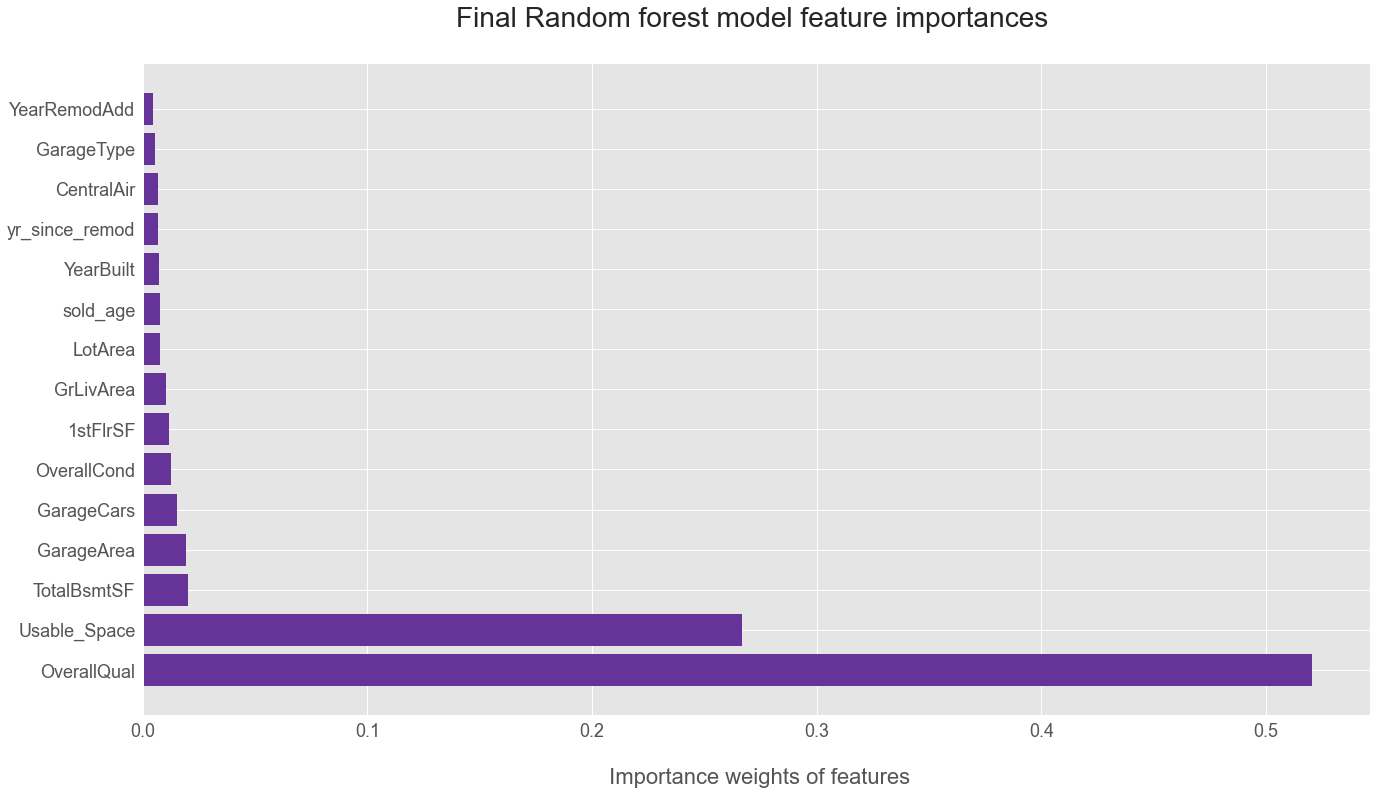

In [37]:
plt.figure(figsize = (22,12))
plt.barh(top_features["Feature Name"].head(15), top_features["Weight"].head(15), color ="rebeccapurple")
plt.xlabel("\n Importance weights of features", fontsize = 22)
plt.title("Final Random forest model feature importances \n", fontsize = 28)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

In [38]:
# Selecting the best model from the Grid Search as the final model

final_forest1 = grid_search_forest.best_estimator_

In [39]:
# Setting max_depth as 10

final_forest1.set_params(max_depth=16)

RandomForestRegressor(max_depth=16, min_samples_leaf=2, n_estimators=150,
                      oob_score=True, random_state=42)

In [40]:
# Model with all features

tree_model_res(trainX_trans, np.log(trainY), testX_trans, np.log(testY), final_forest1, show = True)

Train R^2 is equal to 0.975
Test R^2 is equal to 0.893
Train RMSE is equal to 0.063
Test RMSE is equal to 0.127
The training error is: 0.02488
The test     error is: 0.10654


[0.02488444781275234, 0.10653957076672482]

In [41]:
# Model with all features

selected_feat = top_features.iloc[:,0]
tree_model_res(trainX_trans[selected_feat], np.log(trainY), testX_trans[selected_feat], np.log(testY), final_forest1, show = True)

Train R^2 is equal to 0.975
Test R^2 is equal to 0.893
Train RMSE is equal to 0.063
Test RMSE is equal to 0.127
The training error is: 0.02512
The test     error is: 0.10670


[0.025120022115675544, 0.10670400665675694]

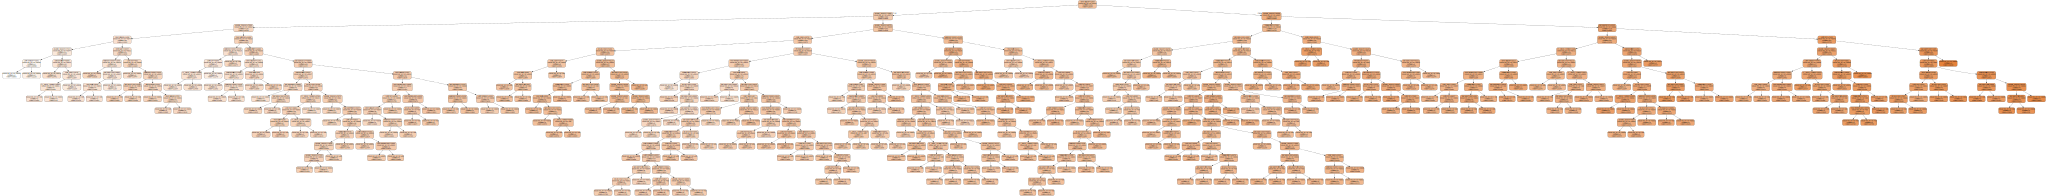

In [42]:
# Visualizing a single tree

from sklearn import tree

forest_tree_data = tree.export_graphviz(final_forest.estimators_[0],
                     out_file=None, rounded=True,                 
                     feature_names = selected_feat, 
                     filled = True)

graph = gv.Source(forest_tree_data)
display(SVG(graph.pipe(format='svg')))

In [43]:
# Using RFE to select features

from sklearn.feature_selection import RFE

rfe = RFE(estimator=final_forest1, n_features_to_select=25, step=10)

tree_model_res(trainX_trans, np.log(trainY), testX_trans, np.log(testY), rfe, show = True)

Train R^2 is equal to 0.975
Test R^2 is equal to 0.891
Train RMSE is equal to 0.063
Test RMSE is equal to 0.129
The training error is: 0.02526
The test     error is: 0.10914


[0.025255129987055036, 0.10913844037610543]

In [44]:
# Looking at RFE feature selection

print(house_x.columns[rfe.support_])

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', 'GrLivArea',
       'KitchenQual', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'MoSold', 'sold_age', 'yr_since_remod', 'Usable_Space'],
      dtype='object')


In [45]:
trainX['house_sales_pred'] = final_forest1.predict(trainX_trans[selected_feat])
trainX['actual_sales'] = np.log(trainY)
trainX['residual'] = trainX['actual_sales'] - trainX['house_sales_pred']

In [46]:
testX['house_sales_pred'] = final_forest1.predict(testX_trans[selected_feat])
testX['actual_sales'] = np.log(testY)
testX['residual'] = testX['actual_sales'] - testX['house_sales_pred']

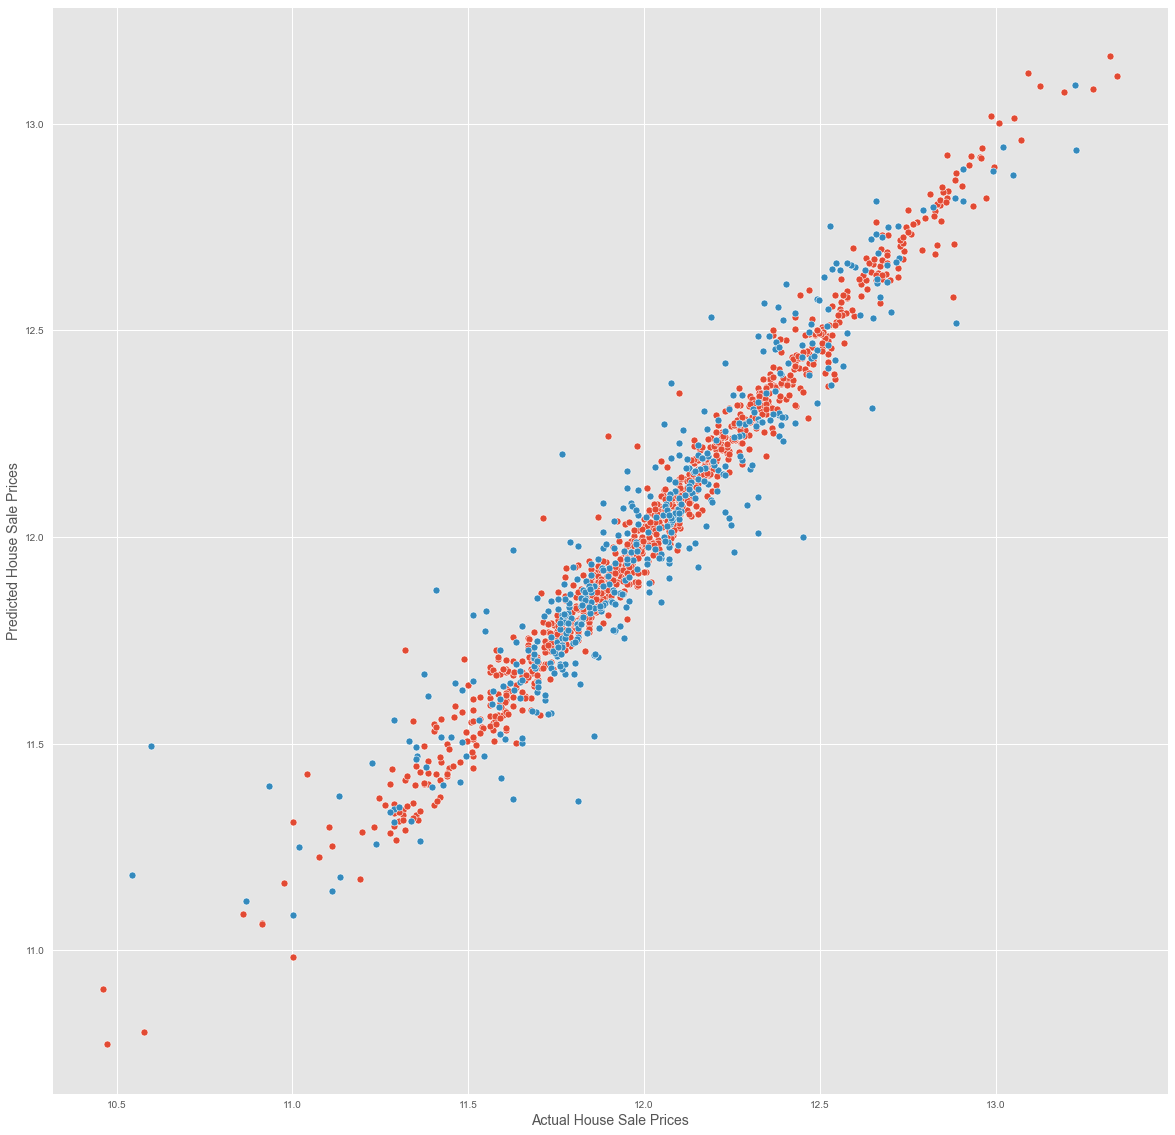

In [47]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=trainX, x='actual_sales', y='house_sales_pred', palette='husl')
sns.scatterplot(data=testX, x='actual_sales', y='house_sales_pred', palette='husl')
plt.ylabel('Predicted House Sale Prices', fontsize=14)
plt.xlabel('Actual House Sale Prices', fontsize=14)
plt.show()

## Visualizing errors and predictions

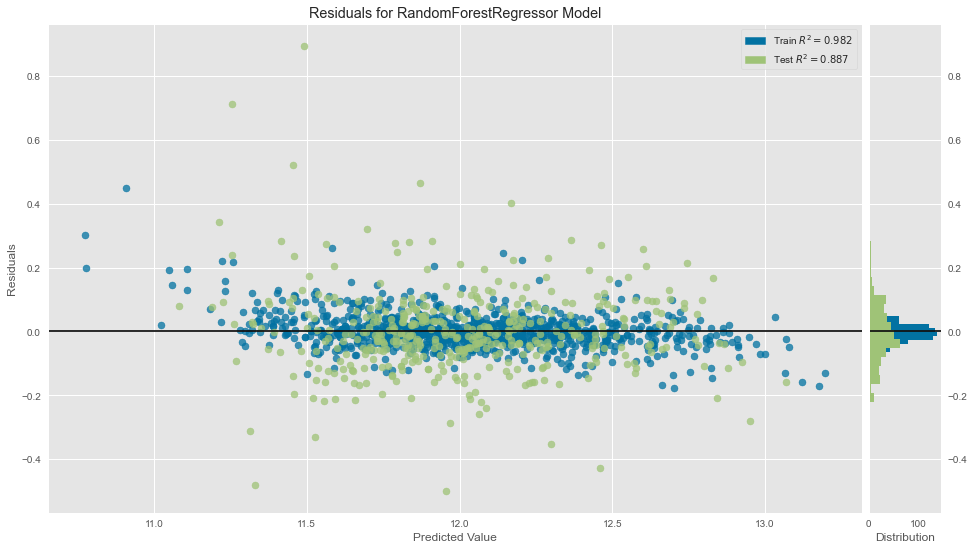

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [48]:
plt.figure(figsize = (16,9))
visualizer = ResidualsPlot(RandomForestRegressor())
visualizer.fit(trainX_trans, np.log(trainY))
visualizer.score(testX_trans, np.log(testY))
visualizer.poof()

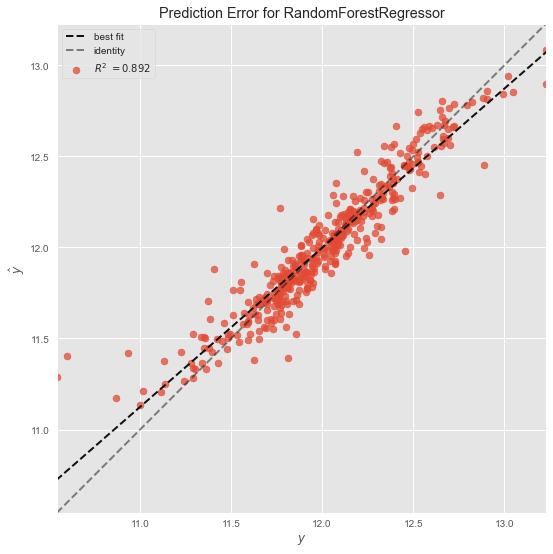

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [49]:
plt.figure(figsize = (16,9))
visualizer = PredictionError(RandomForestRegressor())
visualizer.fit(trainX_trans, np.log(trainY))
visualizer.score(testX_trans, np.log(testY))
visualizer.poof()